## PRML Course Project

### Ensemble learning

#### Random Forest

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

In [8]:
df = pd.read_csv("csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [9]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 2646
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.1+ MB


In [14]:
grouped_df = df.groupby(0)

In [15]:
count = grouped_df.size()

In [16]:
count

0
AJ_Cook               1
AJ_Lamas              1
Aaron_Eckhart         1
Aaron_Guiel           1
Aaron_Patterson       1
                     ..
Zorica_Radovic        1
Zulfiqar_Ahmed        1
Zumrati_Juma          1
Zurab_Tsereteli       1
Zydrunas_Ilgauskas    1
Length: 5749, dtype: int64

In [22]:
df_modified = df[df[0].map(df[0].value_counts()) >= 50]
# Reference Stack overflow

In [23]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 2641
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [5]:
X = df.drop(0,axis = 1)
X = X.loc[:,2993:3249]
y = df[0]

In [7]:
X_copy = X.copy()
for column in X_copy.columns:
    X_copy[column] = (X_copy[column] - X_copy[column].mean())/X_copy[column].std()

In [8]:
max_depth = [25,50,100,250]
n_estimators = [10,20,40,50,100]
n_estimator = 10

Using LBP features
Model training with n_estimator =  10 and max_depth =  15
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.03286739705326785
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
            Abdel_Nasser_Assidi       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.0

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  20
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.02720060445787684
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_Foxman       0.00      0.00      0.00        

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  25
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.029089535323007176
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                       Abdullah       0.00      0.00      0.00         0
          Abdullah_Ahmad_Badawi       0.00      0.00      0.00         0
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00       

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  40
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.01360030222893842
Classification Report:                                    precision    recall  f1-score   support

                     Aaron_Guiel       0.00      0.00      0.00         0
                 Aaron_Patterson       0.00      0.00      0.00         1
                      Aaron_Pena       0.00      0.00      0.00         0
             Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                    Abdul_Rahman       0.00      0.00      0.00         1
               Abdulaziz_Kamilov       0.00      0.00      0.00         1
                        Abdullah       0.00      0.00      0.00         0
                    Abdullah_Gul       0.00      0.00      0.0

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  50
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.014733660748016623
Classification Report:                                    precision    recall  f1-score   support

                     Aaron_Guiel       0.00      0.00      0.00         0
                 Aaron_Patterson       0.00      0.00      0.00         1
                    Aaron_Sorkin       0.00      0.00      0.00         0
             Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                  Abdoulaye_Wade       0.00      0.00      0.00         0
                    Abdul_Rahman       0.00      0.00      0.00         1
               Abdulaziz_Kamilov       0.00      0.00      0.00         1
                        Abdullah       0.00      0.00      0.

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  100
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.019644880997355497
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
                  Aaron_Peirsol       0.00      0.00      0.00         0
                      Abba_Eban       0.00      0.00      0.00         0
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
             Abdel_Madi_Shabneh       0.00      0.00      0.00         0
            Abdel_Nasser_Assidi       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00      

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

<Figure size 640x480 with 0 Axes>

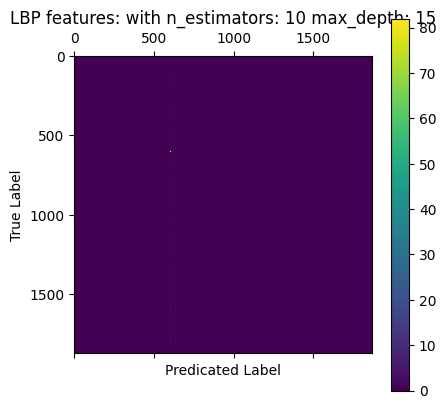

<Figure size 640x480 with 0 Axes>

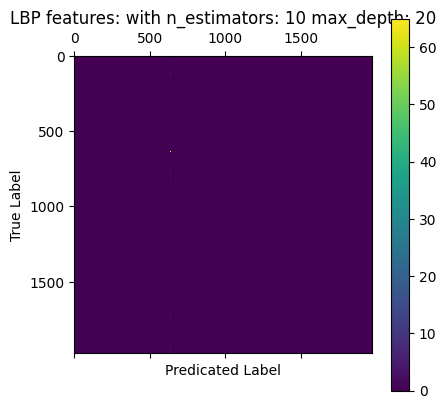

<Figure size 640x480 with 0 Axes>

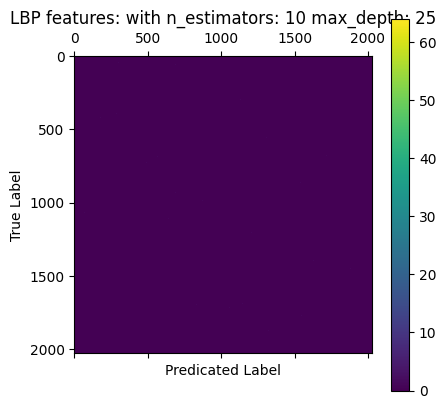

<Figure size 640x480 with 0 Axes>

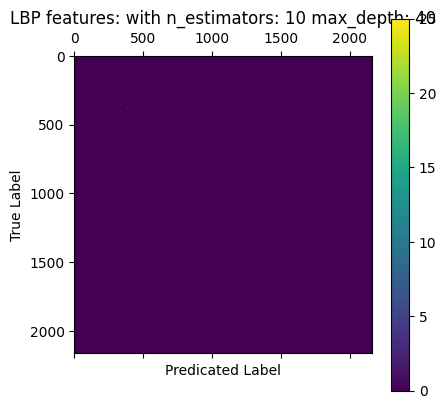

<Figure size 640x480 with 0 Axes>

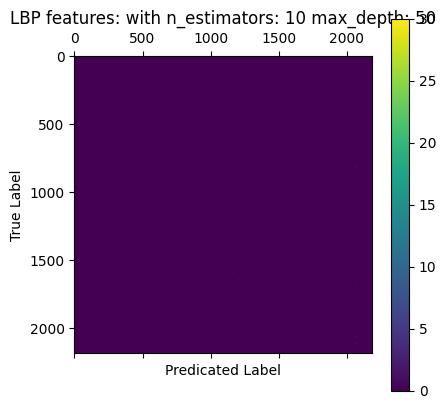

<Figure size 640x480 with 0 Axes>

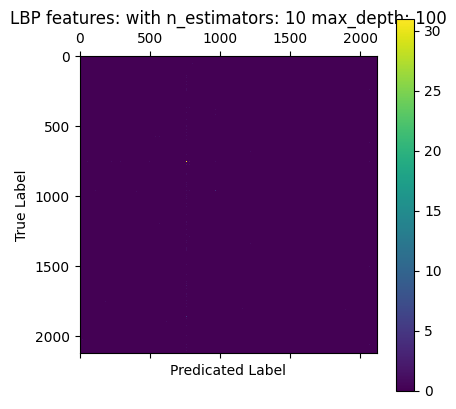

In [19]:
print("Using LBP features")
for depth in max_depth:
    print("Model training with n_estimator = ",n_estimator,"and max_depth = ",depth)
    model_random_forest = RandomForestClassifier(max_depth = depth,n_estimators = 10,verbose = 2)
    model_random_forest.fit(X,y)

    y_pred = model_random_forest.predict(X_test)

    acc = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy = "Accuracy when max_depth = "+str(depth)+"and n_estimators = 10: "+str(acc)
    print("Accuracy of the model",acc)

    accuracy_file = open("accuracy_log.txt",'a')
    accuracy_file.write(accuracy+'\n')
    accuracy_file.close()

    print("Classification Report: " ,classification_report(y_true = y_test,y_pred = y_pred))

    confusionMatrix = confusion_matrix(y_true = y_test,y_pred = y_pred)

    fig = plt.figure()
    plt.matshow(confusionMatrix)

    plt.title(str('LBP features: with n_estimators: '+str(model_random_forest.n_estimators)+' max_depth: '+str(model_random_forest.max_depth)))
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')

    plt.savefig(str(depth)+'_'+str(model_random_forest.n_estimators)+'.jpg')

In [24]:
n_estimator = 20

Using LBP features
Model training with n_estimator =  20 and max_depth =  15
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Accuracy of the model 0.03437854174537212
Classification Report:                                   precision    recall  f1-score   support

                    Aaron_Guiel       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                 Abdoulaye_Wade       0.00      0.00      0.00         0
                   Abdul_Rahman       0.

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  20 and max_depth =  20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Accuracy of the model 0.03060068001511145
Classification Report:                                   precision    recall  f1-score   support

                    Aaron_Guiel       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  20 and max_depth =  25
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Accuracy of the model 0.02871174914998111
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                 Abdoulaye_Wade       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  20 and max_depth =  40
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Accuracy of the model 0.0207782395164337
Classification Report:                                   precision    recall  f1-score   support

                        AJ_Cook       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  20 and max_depth =  50
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Accuracy of the model 0.02455610124669437


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
                  Aaron_Peirsol       0.00      0.00      0.00         0
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                       Abdullah       0.00      0.00      0.00         0
          Abdullah_Ahmad_Badawi       0.00      0.00      0.00         0
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_Foxman       0.00      0.00      0.00         1
                   Aby_Har-Even       0.00      0.00      0.00         1
                   Adam_He

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:                                   precision    recall  f1-score   support

                  Aaron_Eckhart       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
                      Abba_Eban       0.00      0.00      0.00         0
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                 Abdoulaye_Wade       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abner_Martinez       0.00      0.00      0.00         0
                 Abraham_Foxman       0.00      0.00      0.00         1
                   Aby_Har

<Figure size 640x480 with 0 Axes>

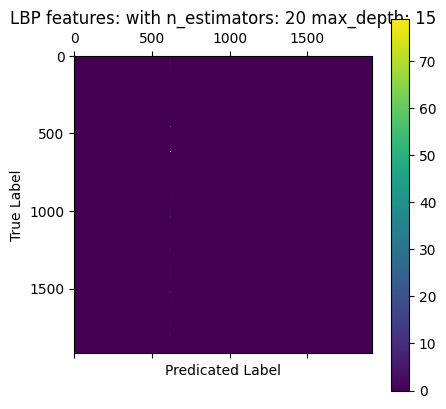

<Figure size 640x480 with 0 Axes>

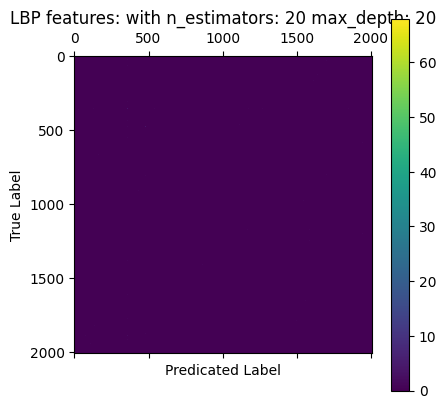

<Figure size 640x480 with 0 Axes>

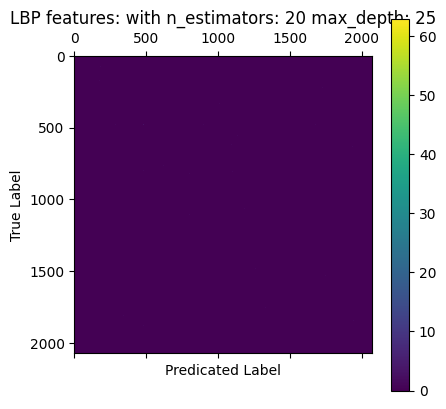

<Figure size 640x480 with 0 Axes>

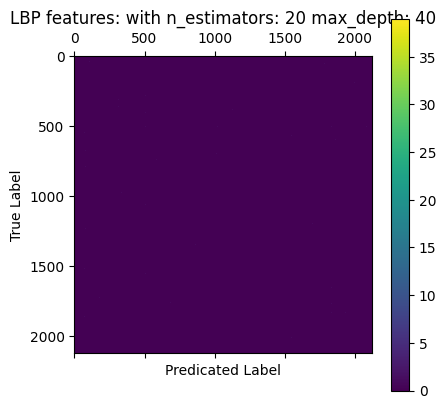

<Figure size 640x480 with 0 Axes>

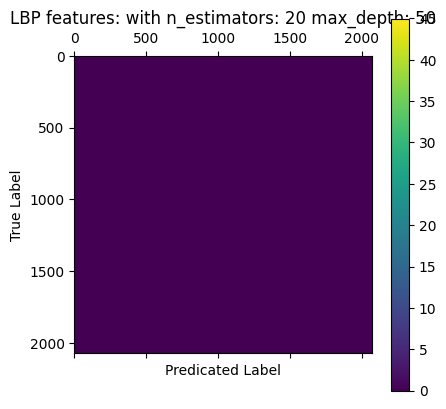

<Figure size 640x480 with 0 Axes>

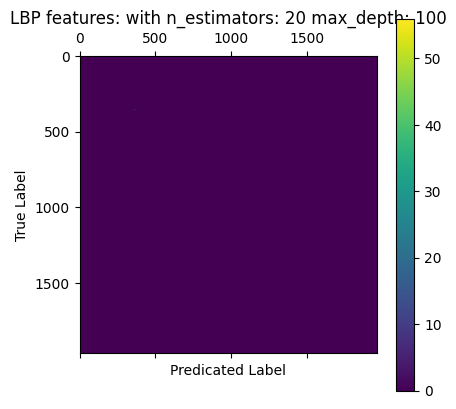

In [25]:
print("Using LBP features")
for depth in max_depth:
    print("Model training with n_estimator = ",n_estimator,"and max_depth = ",depth)
    model_random_forest = RandomForestClassifier(max_depth = depth,n_estimators = n_estimator,verbose = 2)
    model_random_forest.fit(X,y)

    y_pred = model_random_forest.predict(X_test)

    acc = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy = "Accuracy when max_depth = "+str(depth)+" and n_estimators = "+str(n_estimator)+": "+str(acc)
    print("Accuracy of the model",acc)

    accuracy_file = open("accuracy_log.txt",'a')
    accuracy_file.write(accuracy+'\n')
    accuracy_file.close()

    print("Classification Report: " ,classification_report(y_true = y_test,y_pred = y_pred))

    confusionMatrix = confusion_matrix(y_true = y_test,y_pred = y_pred)

    fig = plt.figure()
    plt.matshow(confusionMatrix)

    plt.title(str('LBP features: with n_estimators: '+str(model_random_forest.n_estimators)+' max_depth: '+str(model_random_forest.max_depth)))
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')

    plt.savefig(str(depth)+'_'+str(model_random_forest.n_estimators)+'.jpg')

In [29]:
n_estimator = 10

Using LBP features
Model training with n_estimator =  10 and max_depth =  25
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.028333962976955042
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
             Abdel_Madi_Shabneh       0.00      0.00      0.00         0
            Abdel_Nasser_Assidi       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  100
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.019644880997355497


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
                  Aaron_Peirsol       0.00      0.00      0.00         0
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                 Abdoulaye_Wade       0.00      0.00      0.00         0
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                       Abdullah       0.00      0.00      0.00         0
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
                   Abel_Aguilar       0.00      0.00      0.00         0
                   Abel_Pacheco       0.00      0.00      0.00         0
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_F

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  500
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.009066868152625614
Classification Report:                                   precision    recall  f1-score   support

                  Aaron_Eckhart       0.00      0.00      0.00         0
                    Aaron_Guiel       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
                  Aaron_Peirsol       0.00      0.00      0.00         0
                     Aaron_Pena       0.00      0.00      0.00         0
                   Aaron_Sorkin       0.00      0.00      0.00         0
                   Aaron_Tippin       0.00      0.00      0.00         0
                      Abba_Eban       0.00      0.00      0.00      

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  10 and max_depth =  1000
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy of the model 0.009444654325651681
Classification Report:                                   precision    recall  f1-score   support

                        AJ_Cook       0.00      0.00      0.00         0
                  Aaron_Eckhart       0.00      0.00      0.00         0
                    Aaron_Guiel       0.00      0.00      0.00         0
                Aaron_Patterson       0.00      0.00      0.00         1
                  Aaron_Peirsol       0.00      0.00      0.00         0
                     Aaron_Pena       0.00      0.00      0.00         0
                   Aaron_Sorkin       0.00      0.00      0.00         0
                      Abba_Eban       0.00      0.00      0.00     

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

<Figure size 640x480 with 0 Axes>

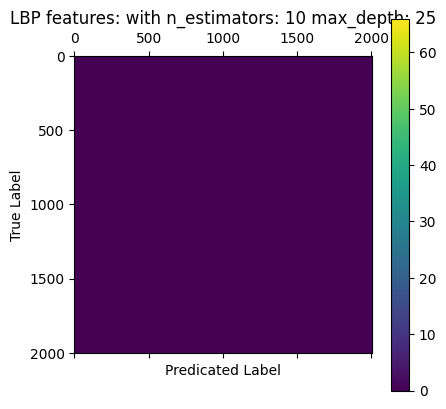

<Figure size 640x480 with 0 Axes>

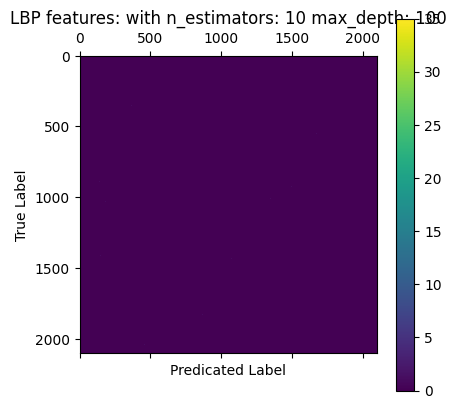

<Figure size 640x480 with 0 Axes>

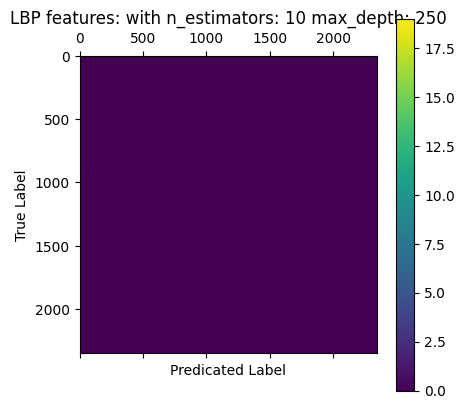

<Figure size 640x480 with 0 Axes>

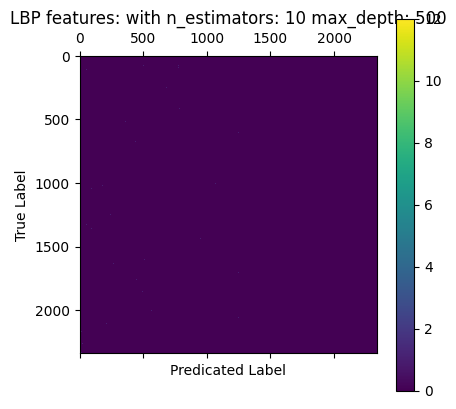

<Figure size 640x480 with 0 Axes>

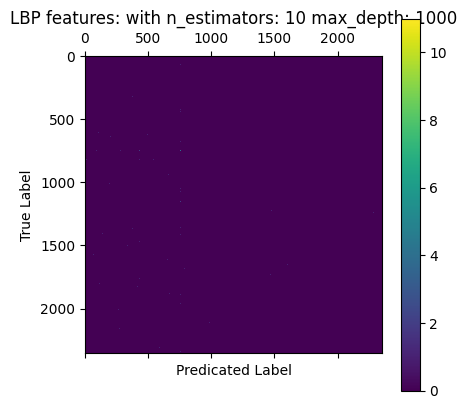

In [31]:
print("Using LBP features")
for depth in max_depth:
    print("Model training with n_estimator = ",n_estimator,"and max_depth = ",depth)
    model_random_forest = RandomForestClassifier(max_depth = depth,n_estimators = n_estimator,verbose = 2)
    model_random_forest.fit(X,y)

    y_pred = model_random_forest.predict(X_test)

    acc = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy = "Accuracy when max_depth = "+str(depth)+" and n_estimators = 10: "+str(acc)
    print("Accuracy of the model",acc)

    accuracy_file = open("accuracy_log.txt",'a')
    accuracy_file.write(accuracy+'\n')
    accuracy_file.close()

    print("Classification Report: " ,classification_report(y_true = y_test,y_pred = y_pred))

    confusionMatrix = confusion_matrix(y_true = y_test,y_pred = y_pred)

    fig = plt.figure()
    plt.matshow(confusionMatrix)

    plt.title(str('LBP features: with n_estimators: '+str(model_random_forest.n_estimators)+' max_depth: '+str(model_random_forest.max_depth)))
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')

    plt.savefig(str(depth)+'_'+str(model_random_forest.n_estimators)+'.jpg')

In [1]:
n_estimator = 100
model_random_forest = RandomForestClassifier(max_depth = 100,n_estimators = n_estimator,verbose = 3)
model_random_forest.fit(X,y)

y_pred = model_random_forest.predict(X_test)

acc = accuracy_score(y_true=y_test,y_pred=y_pred)


NameError: name 'RandomForestClassifier' is not defined

Accuracy of the model 0.03513411409142425
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                       Abdullah       0.00      0.00      0.00         0
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_Foxman       0.00      0.00      0.00         1
                   Aby_Har-Even       0.00      0.00      0.00         1
                   Adam_Sandler       0.00      0.00      0.00         2
                  Adelina_Avila       0.00      0.00     

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

<Figure size 640x480 with 0 Axes>

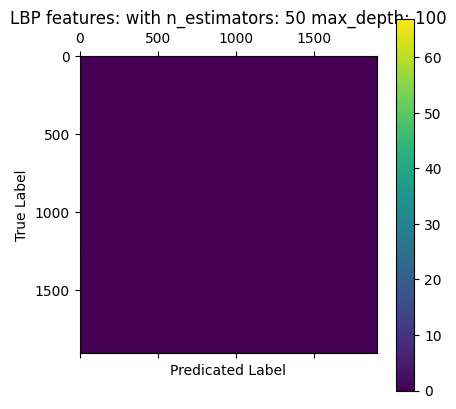

In [11]:
accuracy = "Accuracy when max_depth = "+str(100)+" and n_estimators = 100: "+str(acc)
print("Accuracy of the model",acc)

accuracy_file = open("accuracy_log.txt",'a')
accuracy_file.write(accuracy+'\n')
accuracy_file.close()

print("Classification Report: " ,classification_report(y_true = y_test,y_pred = y_pred))

confusionMatrix = confusion_matrix(y_true = y_test,y_pred = y_pred)

fig = plt.figure()
plt.matshow(confusionMatrix)

plt.title(str('LBP features: with n_estimators: '+str(model_random_forest.n_estimators)+' max_depth: '+str(model_random_forest.max_depth)))
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')

plt.savefig(str(100)+'_'+str(model_random_forest.n_estimators)+'.jpg')

Using LBP features
Model training with n_estimator =  100 and max_depth =  25
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


Accuracy of the model 0.04231205137891953


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_Foxman       0.00      0.00      0.00         1
                   Aby_Har-Even       0.00      0.00      0.00         1
                   Adam_Sandler       0.00      0.00      0.00         2
                  Adelina_Avila       0.00      0.00      0.00         1
          Adriana_Perez_Navarro       0.00      0.00      0.00         1
                   Adrien_

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.6min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


Accuracy of the model 0.04193426520589347
Classification Report:                                   precision    recall  f1-score   support

                Aaron_Patterson       0.00      0.00      0.00         1
            Abdel_Aziz_Al-Hakim       0.00      0.00      0.00         1
                   Abdul_Rahman       0.00      0.00      0.00         1
              Abdulaziz_Kamilov       0.00      0.00      0.00         1
                   Abdullah_Gul       0.00      0.00      0.00         5
               Abdullah_Nasseef       0.00      0.00      0.00         1
   Abid_Hamid_Mahmud_Al-Tikriti       0.00      0.00      0.00         3
                 Abraham_Foxman       0.00      0.00      0.00         1
                   Aby_Har-Even       0.00      0.00      0.00         1
                   Adam_Sandler       0.00      0.00      0.00         2
                  Adelina_Avila       0.00      0.00      0.00         1
          Adriana_Perez_Navarro       0.00      0.00     

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model training with n_estimator =  100 and max_depth =  100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 16.9min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100


MemoryError: could not allocate 320012288 bytes

<Figure size 640x480 with 0 Axes>

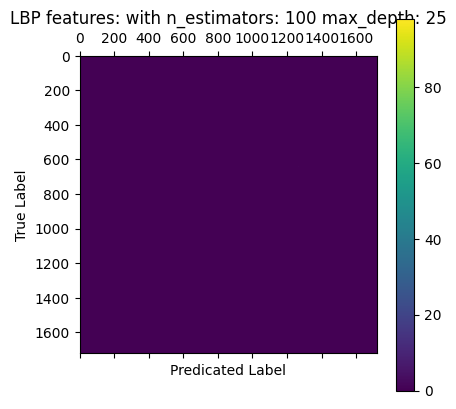

<Figure size 640x480 with 0 Axes>

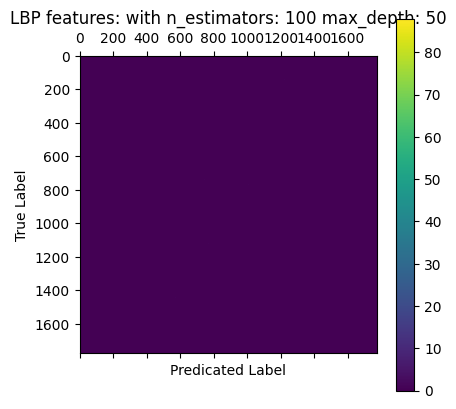

In [36]:
print("Using LBP features")
for depth in max_depth:
    print("Model training with n_estimator = ",n_estimator,"and max_depth = ",depth)
    model_random_forest = RandomForestClassifier(max_depth = depth,n_estimators = n_estimator,verbose = 2)
    model_random_forest.fit(X,y)

    y_pred = model_random_forest.predict(X_test)

    acc = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy = "Accuracy when max_depth = "+str(depth)+" and n_estimators = 100: "+str(acc)
    print("Accuracy of the model",acc)

    accuracy_file = open("accuracy_log.txt",'a')
    accuracy_file.write(accuracy+'\n')
    accuracy_file.close()

    print("Classification Report: " ,classification_report(y_true = y_test,y_pred = y_pred))

    confusionMatrix = confusion_matrix(y_true = y_test,y_pred = y_pred)

    fig = plt.figure()
    plt.matshow(confusionMatrix)

    plt.title(str('LBP features: with n_estimators: '+str(model_random_forest.n_estimators)+' max_depth: '+str(model_random_forest.max_depth)))
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')

    plt.savefig(str(depth)+'_'+str(model_random_forest.n_estimators)+'.jpg')